In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
data = pd.read_csv('/content/Amazon Sales data.csv')

In [ ]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
# Data Cleaning
data.dropna(inplace=True)  # Example step

In [ ]:
# Function to parse dates
def parse_dates(date):
    for fmt in ('%m/%d/%Y', '%d-%m-%Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    raise ValueError(f"No valid date format found for {date}")

In [ ]:
# Data tranformation
data['Order Date'] = data['Order Date'].apply(parse_dates)
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

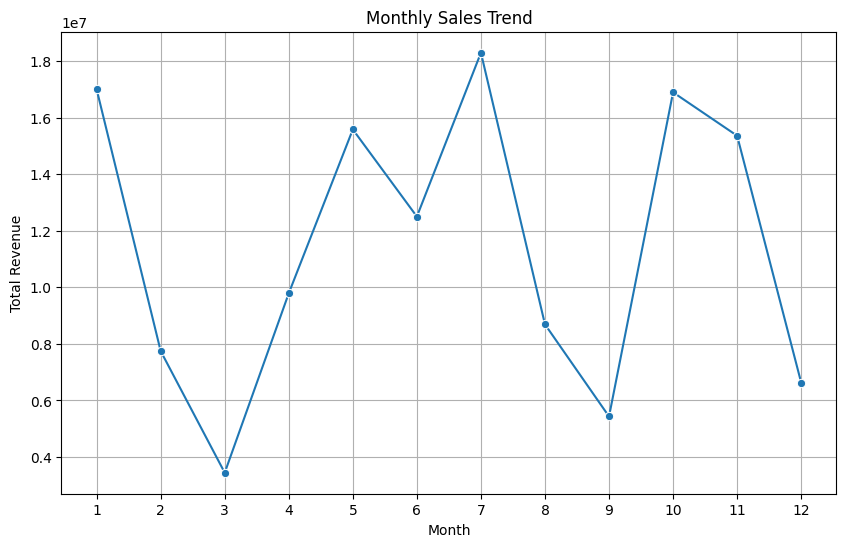

In [ ]:
# Calculate monthly sales
monthly_sales = data.groupby('Month')['Total Revenue'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Revenue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

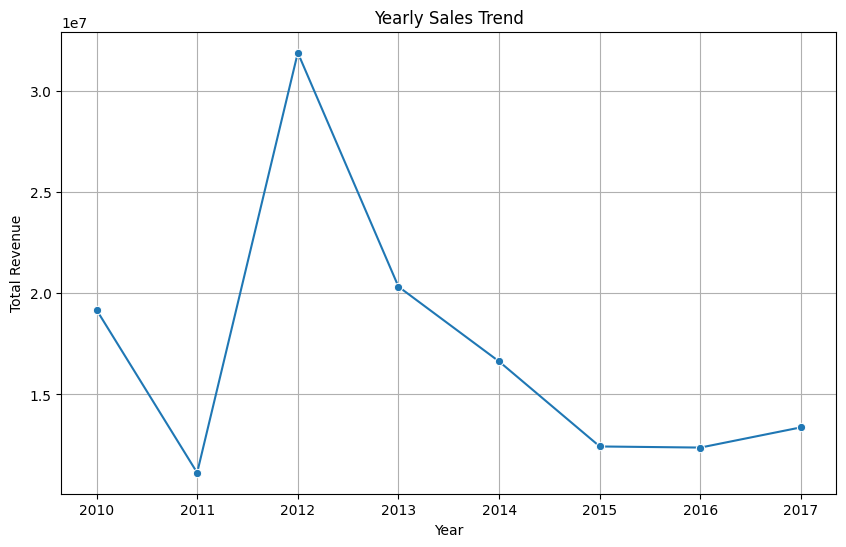

In [ ]:
# Calculate yearly sales
yearly_sales = data.groupby('Year')['Total Revenue'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Total Revenue', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

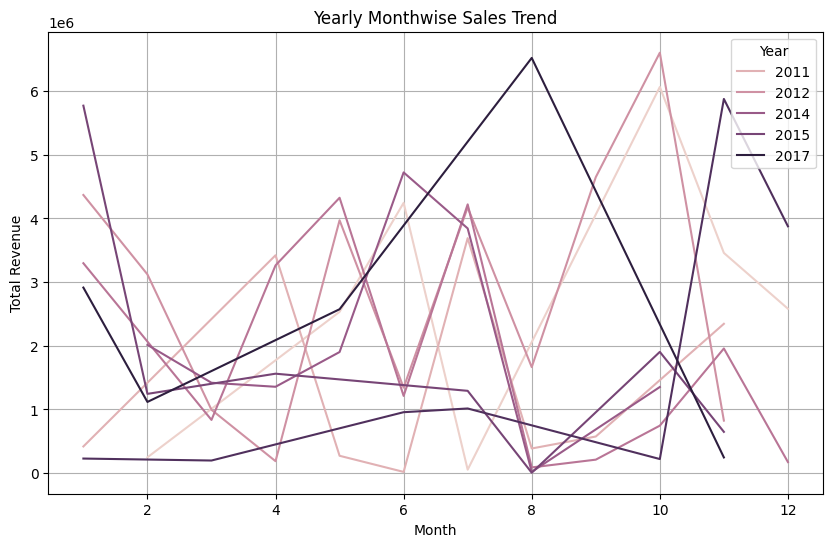

In [ ]:
# Calculate yearly_month_wise sales
yearly_month_wise_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_month_wise_sales, x='Month', y='Total Revenue', hue='Year')
plt.title('Yearly Monthwise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [ ]:
# Key Metrics Calculation
total_sales = data['Total Revenue'].sum()
average_sales = data['Total Revenue'].mean()

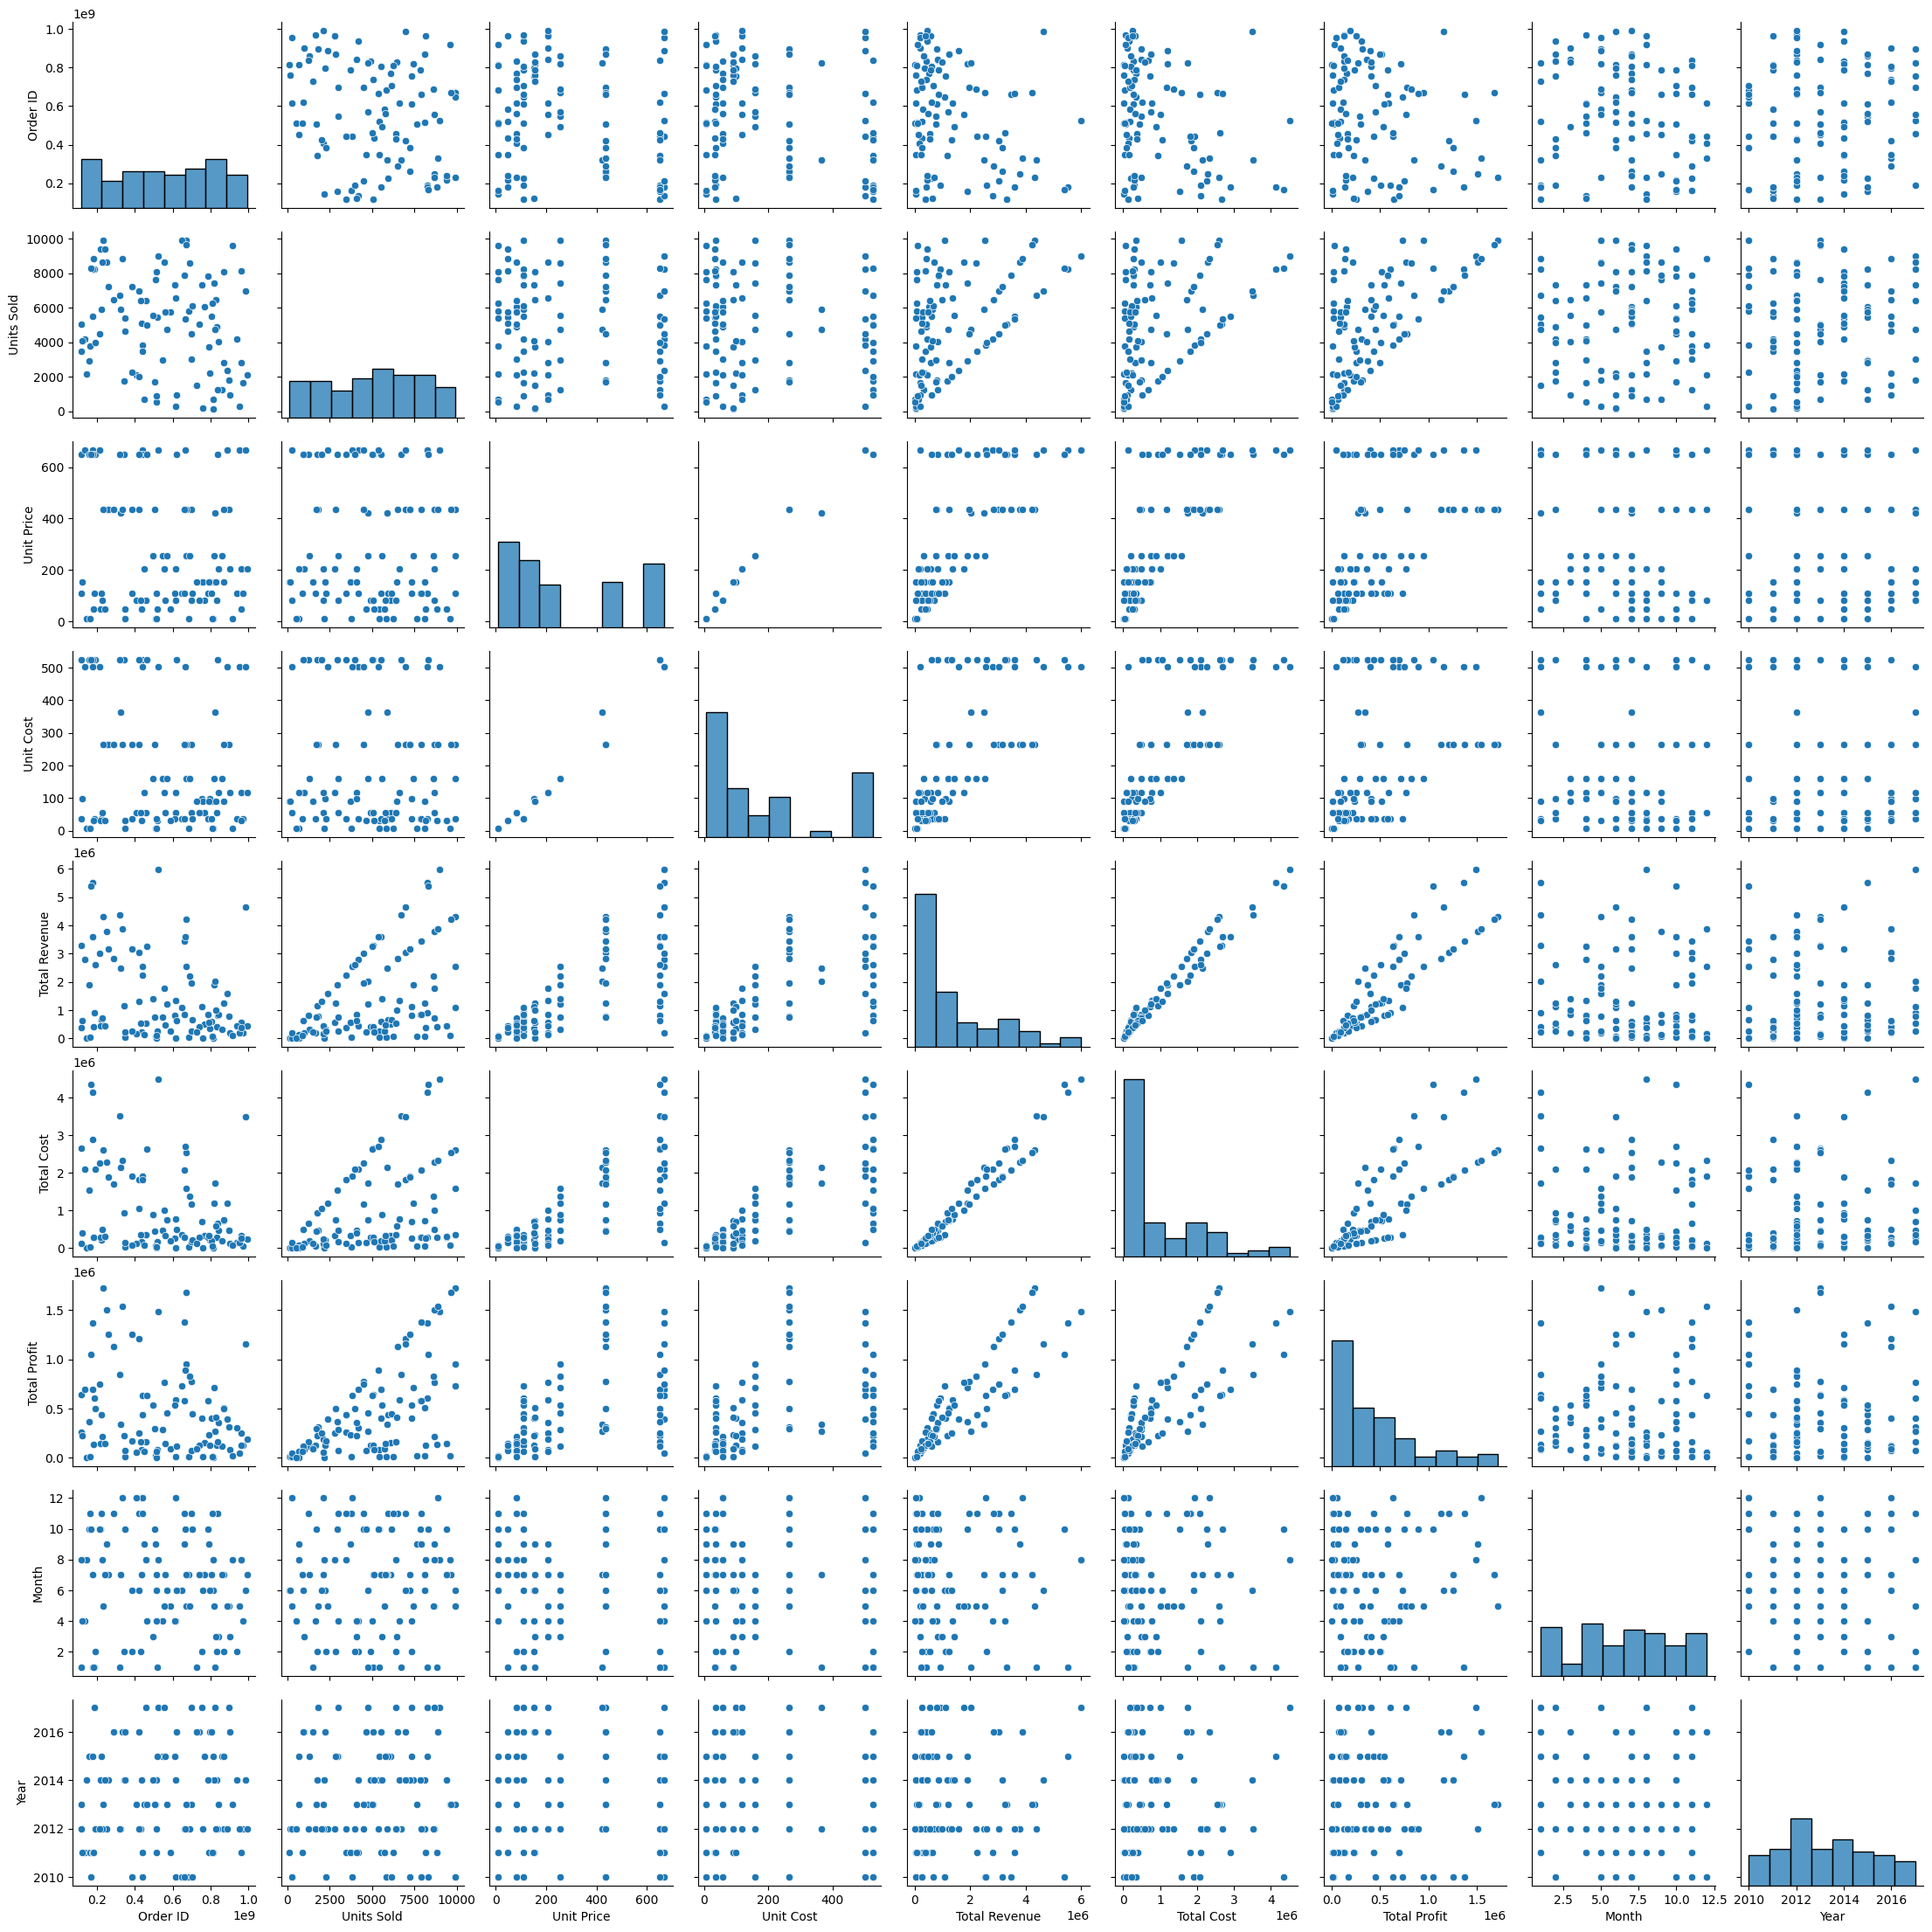

In [ ]:
# Find Relationships between attributes
sns.pairplot(data)
plt.show()

In [ ]:
# Visualization Insights
'''
Analysis based on the pairplot visualization.

Units Sold attribute is slightly positively correlated to Total Revenue, Total Cost and Total Profit.

Unit Price is positively correlated to Unit Cost and slightly positively correlated to Total Revenue, Total Cost and Total Profit.

Unit Cost is positively correlated to Unit Cost and slightly positively correlated to Total Revenue, Total Cost and Total Profit.

Total Revenue is positively correlated to Total Cost and Total Profit and slightly positively correlated to Units Sold, Unit Price, Unit Cost.

Total Cost is positively correlated to Total Revenue, Total Profit and slightly positively correlated to Units Sold, Unit Price, Unit Cost.

Total Profit is positively correlated to Total Revenue, Units Sold, Total Cost.

Month and the Year columns have no correlation with any other columns.


Monthly Sales Analysis -> Based on the monthly sales trend, the sales are good initially during January and are at peak in July, but are at the lowest at December.

Yearly Sales Analysis -> Based on the yearly sales trend, the sales are at a medium level in the year 2010, they are at peak in the year and are at the lowest in 2017.

Yearly Monthwise Sales Analysis -> Based on the yearly monthwise sales trend, during the years 2011 and 2017, during August and October, the sales are at peak. Whereas, in the years
2014 and 2017, during the months November and December, the sales are at the least.

Note: The bar plots means completely correlated to each other. For example, Year to Year.
'''


'\nAnalysis based on the pairplot visualization.\n\nUnits Sold attribute is slightly positively correlated to Total Revenue, Total Cost and Total Profit. \n\nUnit Price is positively correlated to Unit Cost and slightly positively correlated to Total Revenue, Total Cost and Total Profit.\n\nUnit Cost is positively correlated to Unit Cost and slightly positively correlated to Total Revenue, Total Cost and Total Profit.\n\nTotal Revenue is positively correlated to Total Cost and Total Profit and slightly positively correlated to Units Sold, Unit Price, Unit Cost.\n\nTotal Cost is positively correlated to Total Revenue, Total Profit and slightly positively correlated to Units Sold, Unit Price, Unit Cost.\n\nTotal Profit is positively correlated to Total Revenue, Units Sold, Total Cost.\n\nMonth and the Year columns have no correlation with any other columns.\n\nNote: The bar plots means completely correlated to each other. For example, Year to Year.\n'